In [1]:
import os
import sys
import numpy as np

from tensorflow import keras

module_path = os.path.abspath(os.path.join('..', '..', '..'))

if module_path not in sys.path:
    sys.path.append(os.path.join(module_path))

from functions.augmentation import get_augmentation_layers
from functions.loading_data import load_dataset
from functions.class_weights import calculate_class_weight
from functions.model_running import get_run_number, run_model
from models.inception_resnet_v2_models import get_basic_model

In [2]:
WIDTH = 150
HEIGHT = 150
ROOT = os.path.join('..', '..', '..', '..')
DS_NAME = 'data1'
DATA_DIR = os.path.join(
    ROOT,
    '..',
    DS_NAME,
    'images_original_inception_resnet_v2_150x150_categorized')
MODEL_NAME_BASE = 'inception_9_class_weight_and_bias_whole_model_trainable'

In [3]:
BATCH_SIZE = 64
dataset = load_dataset(HEIGHT, WIDTH, DATA_DIR, 'training', BATCH_SIZE)
class_weight = calculate_class_weight(dataset, .6)

Found 8015 files belonging to 7 classes.


In [4]:
METRICS = [
    keras.metrics.CategoricalCrossentropy(name='categorical cross entropy'),
    keras.metrics.MeanSquaredError(name='mean squared error'),
    keras.metrics.CategoricalAccuracy(name='accuracy'),
    keras.metrics.AUC(name='auc', multi_label=True),
    keras.metrics.AUC(name='prc', curve='PR', multi_label=True)
]

In [5]:
train_ds_dir = os.path.join(DATA_DIR, 'training')
class_dirs = [
    os.path.join(train_ds_dir, class_dir)
    for class_dir in os.listdir(train_ds_dir)
    if os.path.isdir(os.path.join(train_ds_dir, class_dir))]
class_counts = [len(os.listdir(class_dir)) for class_dir in class_dirs]
total_samples = np.sum(class_counts)
initial_biases = np.log(class_counts / (total_samples - class_counts))

Found 2000 files belonging to 7 classes.
Epoch 1/100
126/126 [==============================] - ETA: 0s - loss: 7.2132 - categorical cross entropy: 2.0041 - mean squared error: 0.0695 - accuracy: 0.6601 - auc: 0.7033 - prc: 0.2168

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_9_class_weight_and_bias_whole_model_trainable_20_1\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_9_class_weight_and_bias_whole_model_trainable_20_1\assets


126/126 [==============================] - 143s 952ms/step - loss: 7.2132 - categorical cross entropy: 2.0041 - mean squared error: 0.0695 - accuracy: 0.6601 - auc: 0.7033 - prc: 0.2168 - val_loss: 1.0844 - val_categorical cross entropy: 1.0844 - val_mean squared error: 0.0587 - val_accuracy: 0.6865 - val_auc: 0.8437 - val_prc: 0.3188 - lr: 0.0010
Epoch 2/100
126/126 [==============================] - 54s 424ms/step - loss: 3.1472 - categorical cross entropy: 0.8575 - mean squared error: 0.0559 - accuracy: 0.7123 - auc: 0.8596 - prc: 0.3600 - val_loss: 1.1246 - val_categorical cross entropy: 1.1246 - val_mean squared error: 0.0611 - val_accuracy: 0.6915 - val_auc: 0.8491 - val_prc: 0.3482 - lr: 0.0010
Epoch 3/100
126/126 [==============================] - ETA: 0s - loss: 2.7380 - categorical cross entropy: 0.7572 - mean squared error: 0.0521 - accuracy: 0.7311 - auc: 0.8911 - prc: 0.4500

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_9_class_weight_and_bias_whole_model_trainable_20_3\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_9_class_weight_and_bias_whole_model_trainable_20_3\assets


126/126 [==============================] - 117s 928ms/step - loss: 2.7380 - categorical cross entropy: 0.7572 - mean squared error: 0.0521 - accuracy: 0.7311 - auc: 0.8911 - prc: 0.4500 - val_loss: 0.7479 - val_categorical cross entropy: 0.7479 - val_mean squared error: 0.0515 - val_accuracy: 0.7335 - val_auc: 0.9031 - val_prc: 0.5187 - lr: 0.0010
Epoch 4/100
126/126 [==============================] - ETA: 0s - loss: 2.4677 - categorical cross entropy: 0.6884 - mean squared error: 0.0487 - accuracy: 0.7516 - auc: 0.9087 - prc: 0.5138

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_9_class_weight_and_bias_whole_model_trainable_20_4\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_9_class_weight_and_bias_whole_model_trainable_20_4\assets


126/126 [==============================] - 117s 932ms/step - loss: 2.4677 - categorical cross entropy: 0.6884 - mean squared error: 0.0487 - accuracy: 0.7516 - auc: 0.9087 - prc: 0.5138 - val_loss: 0.6921 - val_categorical cross entropy: 0.6921 - val_mean squared error: 0.0485 - val_accuracy: 0.7560 - val_auc: 0.9245 - val_prc: 0.5854 - lr: 0.0010
Epoch 5/100
126/126 [==============================] - 58s 455ms/step - loss: 2.3322 - categorical cross entropy: 0.6519 - mean squared error: 0.0466 - accuracy: 0.7647 - auc: 0.9201 - prc: 0.5556 - val_loss: 0.7110 - val_categorical cross entropy: 0.7110 - val_mean squared error: 0.0511 - val_accuracy: 0.7340 - val_auc: 0.9321 - val_prc: 0.6283 - lr: 0.0010
Epoch 6/100
126/126 [==============================] - ETA: 0s - loss: 2.2149 - categorical cross entropy: 0.6289 - mean squared error: 0.0452 - accuracy: 0.7714 - auc: 0.9287 - prc: 0.6074

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_9_class_weight_and_bias_whole_model_trainable_20_6\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_9_class_weight_and_bias_whole_model_trainable_20_6\assets


126/126 [==============================] - 120s 955ms/step - loss: 2.2149 - categorical cross entropy: 0.6289 - mean squared error: 0.0452 - accuracy: 0.7714 - auc: 0.9287 - prc: 0.6074 - val_loss: 0.6327 - val_categorical cross entropy: 0.6327 - val_mean squared error: 0.0450 - val_accuracy: 0.7695 - val_auc: 0.9308 - val_prc: 0.6138 - lr: 0.0010
Epoch 7/100
126/126 [==============================] - 58s 455ms/step - loss: 2.0842 - categorical cross entropy: 0.5935 - mean squared error: 0.0428 - accuracy: 0.7840 - auc: 0.9361 - prc: 0.6517 - val_loss: 0.6495 - val_categorical cross entropy: 0.6495 - val_mean squared error: 0.0475 - val_accuracy: 0.7530 - val_auc: 0.9338 - val_prc: 0.6337 - lr: 0.0010
Epoch 8/100
126/126 [==============================] - ETA: 0s - loss: 2.0560 - categorical cross entropy: 0.5837 - mean squared error: 0.0423 - accuracy: 0.7871 - auc: 0.9399 - prc: 0.6479

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_9_class_weight_and_bias_whole_model_trainable_20_8\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_9_class_weight_and_bias_whole_model_trainable_20_8\assets


126/126 [==============================] - 120s 957ms/step - loss: 2.0560 - categorical cross entropy: 0.5837 - mean squared error: 0.0423 - accuracy: 0.7871 - auc: 0.9399 - prc: 0.6479 - val_loss: 0.6266 - val_categorical cross entropy: 0.6266 - val_mean squared error: 0.0461 - val_accuracy: 0.7600 - val_auc: 0.9414 - val_prc: 0.6652 - lr: 0.0010
Epoch 9/100
126/126 [==============================] - 59s 464ms/step - loss: 1.9764 - categorical cross entropy: 0.5673 - mean squared error: 0.0412 - accuracy: 0.7950 - auc: 0.9434 - prc: 0.6792 - val_loss: 1.3140 - val_categorical cross entropy: 1.3140 - val_mean squared error: 0.0816 - val_accuracy: 0.6005 - val_auc: 0.8290 - val_prc: 0.4797 - lr: 0.0010
Epoch 10/100
126/126 [==============================] - 58s 462ms/step - loss: 2.0922 - categorical cross entropy: 0.5962 - mean squared error: 0.0435 - accuracy: 0.7784 - auc: 0.9360 - prc: 0.6412 - val_loss: 1.4629 - val_categorical cross entropy: 1.4629 - val_mean squared error: 0.0709

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_9_class_weight_and_bias_whole_model_trainable_20_12\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_9_class_weight_and_bias_whole_model_trainable_20_12\assets


126/126 [==============================] - 121s 966ms/step - loss: 1.9494 - categorical cross entropy: 0.5601 - mean squared error: 0.0412 - accuracy: 0.7924 - auc: 0.9460 - prc: 0.6716 - val_loss: 0.5857 - val_categorical cross entropy: 0.5857 - val_mean squared error: 0.0422 - val_accuracy: 0.7910 - val_auc: 0.9449 - val_prc: 0.6964 - lr: 0.0010
Epoch 13/100
126/126 [==============================] - 59s 468ms/step - loss: 1.8559 - categorical cross entropy: 0.5352 - mean squared error: 0.0395 - accuracy: 0.8042 - auc: 0.9497 - prc: 0.7113 - val_loss: 143.1510 - val_categorical cross entropy: 143.1510 - val_mean squared error: 0.0541 - val_accuracy: 0.7465 - val_auc: 0.8391 - val_prc: 0.5299 - lr: 0.0010
Epoch 14/100
126/126 [==============================] - 59s 468ms/step - loss: 1.9295 - categorical cross entropy: 0.5508 - mean squared error: 0.0404 - accuracy: 0.7995 - auc: 0.9451 - prc: 0.6816 - val_loss: 0.8043 - val_categorical cross entropy: 0.8043 - val_mean squared error: 0

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_9_class_weight_and_bias_whole_model_trainable_20_19\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_9_class_weight_and_bias_whole_model_trainable_20_19\assets


126/126 [==============================] - 121s 963ms/step - loss: 2.0445 - categorical cross entropy: 0.5809 - mean squared error: 0.0421 - accuracy: 0.7900 - auc: 0.9387 - prc: 0.6502 - val_loss: 0.5713 - val_categorical cross entropy: 0.5713 - val_mean squared error: 0.0409 - val_accuracy: 0.8005 - val_auc: 0.9423 - val_prc: 0.7145 - lr: 0.0010
Epoch 20/100
126/126 [==============================] - 62s 486ms/step - loss: 2.0406 - categorical cross entropy: 0.5761 - mean squared error: 0.0417 - accuracy: 0.7918 - auc: 0.9367 - prc: 0.6535 - val_loss: 0.5933 - val_categorical cross entropy: 0.5933 - val_mean squared error: 0.0430 - val_accuracy: 0.7885 - val_auc: 0.9348 - val_prc: 0.6725 - lr: 0.0010
Epoch 21/100
126/126 [==============================] - 61s 484ms/step - loss: 2.0177 - categorical cross entropy: 0.5709 - mean squared error: 0.0412 - accuracy: 0.7956 - auc: 0.9421 - prc: 0.6626 - val_loss: 0.6225 - val_categorical cross entropy: 0.6225 - val_mean squared error: 0.045

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_9_class_weight_and_bias_whole_model_trainable_20_25\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_9_class_weight_and_bias_whole_model_trainable_20_25\assets


126/126 [==============================] - 124s 985ms/step - loss: 1.8714 - categorical cross entropy: 0.5358 - mean squared error: 0.0396 - accuracy: 0.8021 - auc: 0.9503 - prc: 0.6989 - val_loss: 0.5641 - val_categorical cross entropy: 0.5641 - val_mean squared error: 0.0404 - val_accuracy: 0.7995 - val_auc: 0.9401 - val_prc: 0.6984 - lr: 0.0010
Epoch 26/100
126/126 [==============================] - 60s 474ms/step - loss: 1.7320 - categorical cross entropy: 0.4999 - mean squared error: 0.0371 - accuracy: 0.8142 - auc: 0.9562 - prc: 0.7413 - val_loss: 0.5831 - val_categorical cross entropy: 0.5831 - val_mean squared error: 0.0425 - val_accuracy: 0.7875 - val_auc: 0.9449 - val_prc: 0.6456 - lr: 0.0010
Epoch 27/100
126/126 [==============================] - 60s 477ms/step - loss: 1.7644 - categorical cross entropy: 0.5065 - mean squared error: 0.0376 - accuracy: 0.8135 - auc: 0.9555 - prc: 0.7250 - val_loss: 0.6207 - val_categorical cross entropy: 0.6207 - val_mean squared error: 0.045

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_9_class_weight_and_bias_whole_model_trainable_20_37\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_9_class_weight_and_bias_whole_model_trainable_20_37\assets


126/126 [==============================] - 121s 961ms/step - loss: 1.6470 - categorical cross entropy: 0.4757 - mean squared error: 0.0356 - accuracy: 0.8245 - auc: 0.9594 - prc: 0.7580 - val_loss: 0.5581 - val_categorical cross entropy: 0.5581 - val_mean squared error: 0.0402 - val_accuracy: 0.7980 - val_auc: 0.9402 - val_prc: 0.6819 - lr: 9.5000e-04
Epoch 38/100
126/126 [==============================] - ETA: 0s - loss: 1.6904 - categorical cross entropy: 0.4904 - mean squared error: 0.0368 - accuracy: 0.8206 - auc: 0.9577 - prc: 0.7504

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_9_class_weight_and_bias_whole_model_trainable_20_38\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_9_class_weight_and_bias_whole_model_trainable_20_38\assets


126/126 [==============================] - 125s 992ms/step - loss: 1.6904 - categorical cross entropy: 0.4904 - mean squared error: 0.0368 - accuracy: 0.8206 - auc: 0.9577 - prc: 0.7504 - val_loss: 0.5428 - val_categorical cross entropy: 0.5428 - val_mean squared error: 0.0398 - val_accuracy: 0.8060 - val_auc: 0.9475 - val_prc: 0.7064 - lr: 9.5000e-04
Epoch 39/100
126/126 [==============================] - 65s 515ms/step - loss: 1.6863 - categorical cross entropy: 0.4885 - mean squared error: 0.0369 - accuracy: 0.8182 - auc: 0.9600 - prc: 0.7481 - val_loss: 1.0710 - val_categorical cross entropy: 1.0710 - val_mean squared error: 0.0447 - val_accuracy: 0.7765 - val_auc: 0.9358 - val_prc: 0.6641 - lr: 9.5000e-04
Epoch 40/100
126/126 [==============================] - 65s 515ms/step - loss: 2.2992 - categorical cross entropy: 0.6434 - mean squared error: 0.0457 - accuracy: 0.7719 - auc: 0.9204 - prc: 0.5990 - val_loss: 725.0796 - val_categorical cross entropy: 725.0796 - val_mean squared 

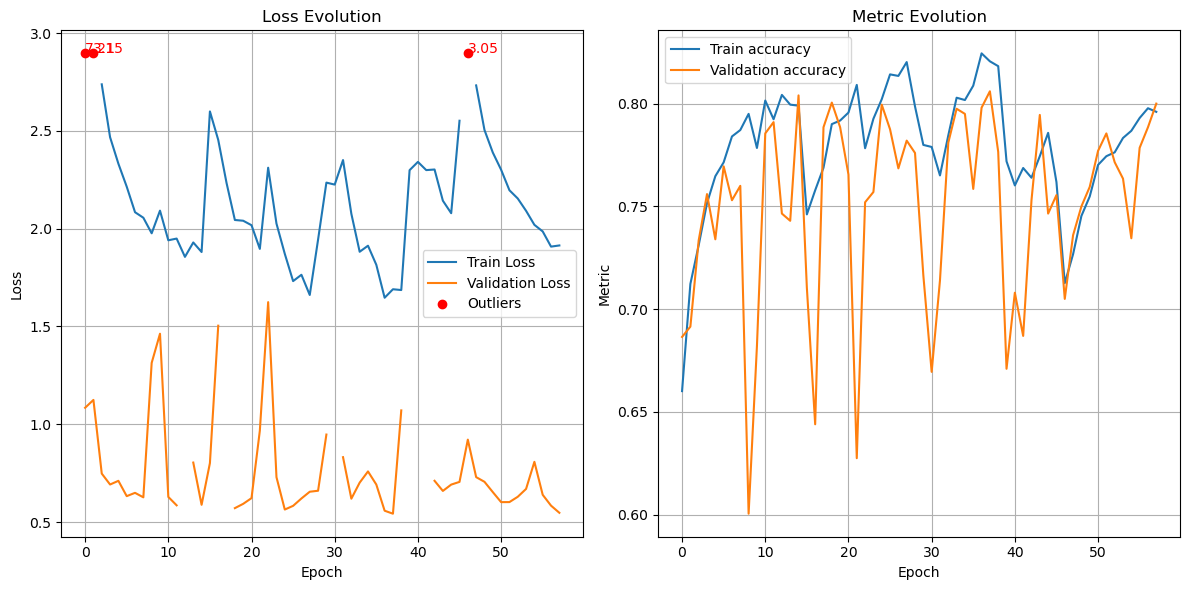

In [6]:
_, history = run_model(
    ROOT,
    HEIGHT,
    WIDTH,
    DATA_DIR,
    DS_NAME,
    MODEL_NAME_BASE,
    lambda num_classes:
        lambda: get_basic_model(
            HEIGHT,
            WIDTH,
            num_classes,
            metrics=METRICS,
            biases=keras.initializers.Constant(initial_biases)),
    get_augmentation_layers,
    batch_size=BATCH_SIZE,
    train_dataset=dataset,
    class_weight=class_weight,
    stopping_patience=20)